# Fragmenting Molecules

This notebook aims to show how a drug-like molecule can be fragmented using this
framework, and how those fragments can be easily visualised using its built-in
helper utilities.

To begin with we load in the molecule to be fragmented. Here we load Cobimetinib
directly using its SMILES representation using the [Open Force Field toolkit](
https://github.com/openforcefield/openff-toolkit):

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole
from openff.toolkit.topology import Molecule
from fragmenter.chemi import assign_elf10_am1_bond_orders
from IPython.display import SVG
parent_molecule = Molecule.from_smiles("c1cc(Cl)ccc1c2ccncc2")

Next we create the fragmentation engine which will perform the actual fragmentation.
Here we will use the recommended `WBOFragmenter` with default options:

In [2]:
from fragmenter.fragment import WBOFragmenter

frag_engine = WBOFragmenter()
# Export the engine's settings directly to JSON
frag_engine.json()

'{"functional_groups": {"hydrazine": "[NX3:1][NX3:2]", "hydrazone": "[NX3:1][NX2:2]", "nitric_oxide": "[N:1]-[O:2]", "amide": "[#7:1][#6:2](=[#8:3])", "amide_n": "[#7:1][#6:2](-[O-:3])", "amide_2": "[NX3:1][CX3:2](=[OX1:3])[NX3:4]", "aldehyde": "[CX3H1:1](=[O:2])[#6:3]", "sulfoxide_1": "[#16X3:1]=[OX1:2]", "sulfoxide_2": "[#16X3+:1][OX1-:2]", "sulfonyl": "[#16X4:1](=[OX1:2])=[OX1:3]", "sulfinic_acid": "[#16X3:1](=[OX1:2])[OX2H,OX1H0-:3]", "sulfinamide": "[#16X4:1](=[OX1:2])(=[OX1:3])([NX3R0:4])", "sulfonic_acid": "[#16X4:1](=[OX1:2])(=[OX1:3])[OX2H,OX1H0-:4]", "phosphine_oxide": "[PX4:1](=[OX1:2])([#6:3])([#6:4])([#6:5])", "phosphonate": "[P:1](=[OX1:2])([OX2H,OX1-:3])([OX2H,OX1-:4])", "phosphate": "[PX4:1](=[OX1:2])([#8:3])([#8:4])([#8:5])", "carboxylic_acid": "[CX3:1](=[O:2])[OX1H0-,OX2H1:3]", "nitro_1": "[NX3+:1](=[O:2])[O-:3]", "nitro_2": "[NX3:1](=[O:2])=[O:3]", "ester": "[CX3:1](=[O:2])[OX2H0:3]", "tri_halide": "[#6:1]([F,Cl,I,Br:2])([F,Cl,I,Br:3])([F,Cl,I,Br:4])"}, "scheme": "WB

Use the engine to fragment the molecule:

In [3]:
result = frag_engine.fragment(parent_molecule)
# Export the result directly to JSON
result.json()

/home/iwatobipen/miniconda3/envs/fragmenter/lib/python3.8/site-packages/openff/toolkit/utils/toolkits.py:3713: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(


'{"fractional_bond_orders": [0.99999409, 1.42912966, 1.42913978, 1.38735181, 0.93251134, 1.38734081, 0.93251124, 1.4290477, 1.38405609, 0.94470199, 1.4290471, 1.38405644, 0.94470204, 1.39103458, 0.94587329, 1.39104572, 0.94587337, 1.37938953, 0.94591621, 1.37939039, 0.94591628, 1.00485253], "parent_smiles": "[Cl:1][c:11]1[c:5]([H:16])[c:9]([H:20])[c:13](-[c:12]2[c:7]([H:18])[c:3]([H:14])[n:2][c:4]([H:15])[c:8]2[H:19])[c:10]([H:21])[c:6]1[H:17]", "fragments": [{"smiles": "[H][c:11]1[c:5]([H:16])[c:9]([H:20])[c:13](-[c:12]2[c:7]([H:18])[c:3]([H:14])[n:2][c:4]([H:15])[c:8]2[H:19])[c:10]([H:21])[c:6]1[H:17]", "bond_indices": [12, 13]}], "provenance": {"creator": "fragmenter", "version": "0.0.7+10.gfe8ded1.dirty", "options": {"functional_groups": {"hydrazine": "[NX3:1][NX3:2]", "hydrazone": "[NX3:1][NX2:2]", "nitric_oxide": "[N:1]-[O:2]", "amide": "[#7:1][#6:2](=[#8:3])", "amide_n": "[#7:1][#6:2](-[O-:3])", "amide_2": "[NX3:1][CX3:2](=[OX1:3])[NX3:4]", "aldehyde": "[CX3H1:1](=[O:2])[#6:3]",

Any generated fragments will be returned in a ``FragmentationResult`` object.
We can loop over each of the generated fragments and print both the SMILES
representation of the fragment as well as the map indices of the bond that the
fragment was built around:

In [4]:
for fragment in result.fragments:
    print(f"{fragment.bond_indices}: {fragment.smiles}")
    print("*"*20)

(12, 13): [H][c:11]1[c:5]([H:16])[c:9]([H:20])[c:13](-[c:12]2[c:7]([H:18])[c:3]([H:14])[n:2][c:4]([H:15])[c:8]2[H:19])[c:10]([H:21])[c:6]1[H:17]
********************


Finally, we can visualize the produced fragments:

In [5]:
from fragmenter.depiction import depict_fragmentation_result

depict_fragmentation_result(result=result, output_file="example_fragments2.html")

from IPython.core.display import display, HTML

with open("example_fragments2.html") as file:
    display(HTML(file.read()))

In [6]:
from fragmenter.depiction import depict_fragmentation_result, _rd_render_fragment

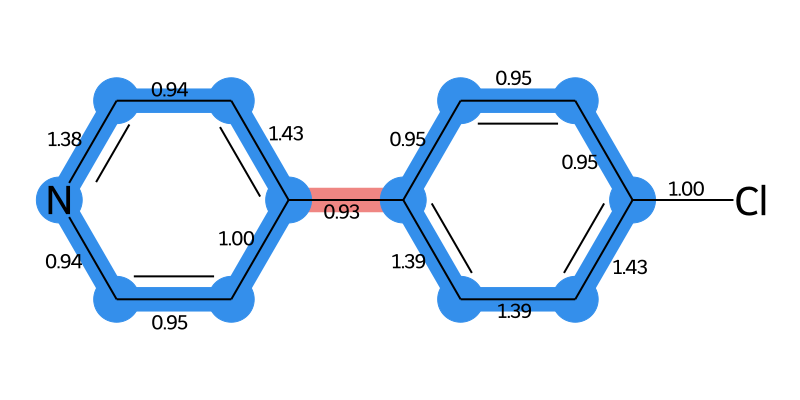

In [8]:
SVG(_rd_render_fragment(result.parent_molecule, result.fragment_molecules[(12,13)], (12,13), image_width=800, image_height=400))